In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

# Generate a moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=808)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=808)

# Define XGBoost model
model = xgb.XGBClassifier(eval_metric="logloss", random_state=808)

In [2]:
# Define hyperparameter distributions
param_dist = {
    "n_estimators": randint(50, 300),
    "learning_rate": uniform(0.01, 0.3),
    "max_depth": randint(2, 10),
    "subsample": uniform(0.5, 0.5), # uniform(start, range)
    "colsample_bytree": uniform(0.5, 0.5)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
                                    model, 
                                    param_dist, 
                                    n_iter=20,
                                    scoring="accuracy",
                                    cv=3,
                                    verbose=1,
                                    random_state=808)

In [3]:
# Run random search
random_search.fit(X_train, y_train)

# Get search results as a DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Extract hyperparameters and accuracy
params_to_plot = ["param_learning_rate", "param_n_estimators",
                 "param_max_depth", "param_subsample",
                 "param_colsample_bytree"]

accuracy = results["mean_test_score"]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


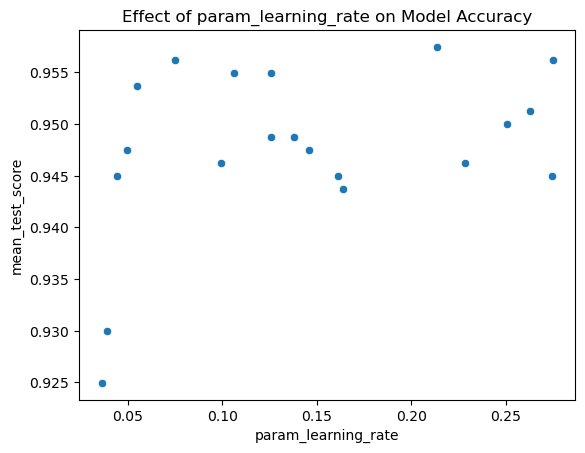

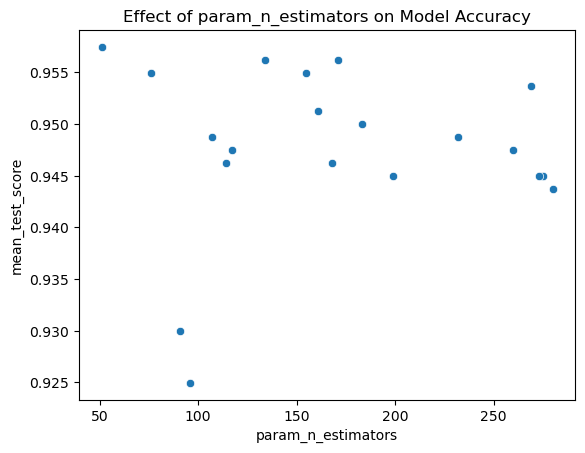

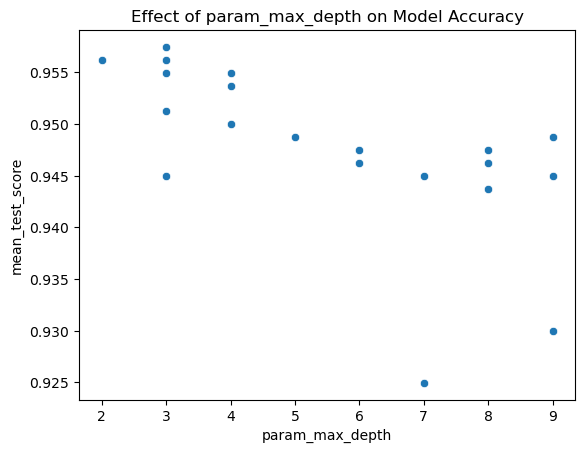

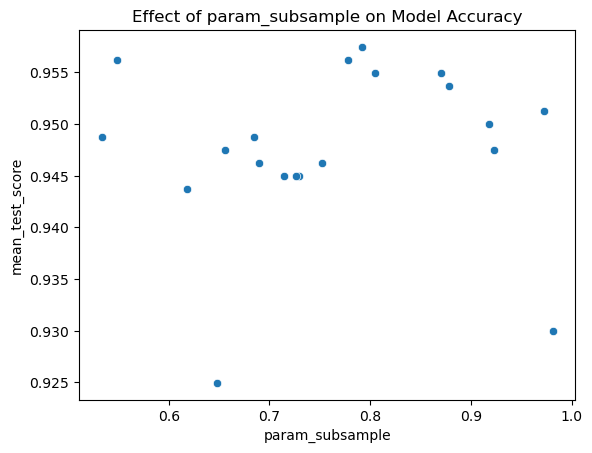

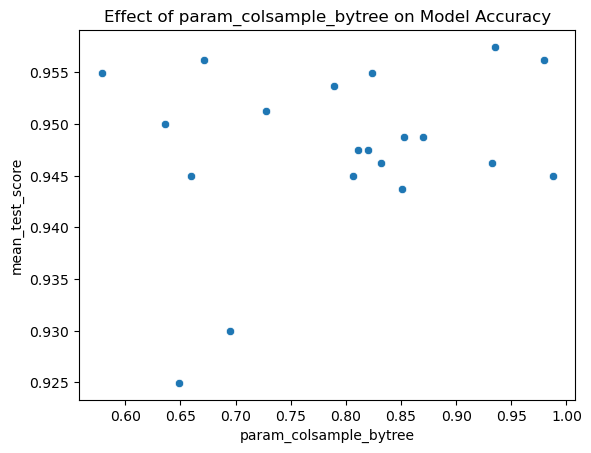

In [4]:
# Generate scatter plots for each hyperparameter vs. accuracy
for param in params_to_plot:
    sns.scatterplot(x=results[param], y=accuracy),
    plt.title(f"Effect of {param} on Model Accuracy")
    plt.show()